<a href="https://colab.research.google.com/github/rahulmnair1997/LabelMaster_Sales_Forecasting/blob/main/EDA_books.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import sys
import numpy as np
import warnings
from feature_selector import FeatureSelector
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('C:/Users/11602/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Packaging_ext.csv', index_col=0)
#df = pd.read_csv('C:/Users/Sword Guo/OneDrive/Practicum/LabelMaster_Sales_Forecasting/data/Packaging_ext.csv', index_col=0)

df

,Year_Month,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking",...,"East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Imports_y.1","Western Canadian Port Activity, Total TEUs_Exports_y.1","Western Canadian Port Activity, Total TEUs_SA Imports_y.1",Total Intermodal (w/o FSC)_y.1,Total Intermodal (w/ FSC)_y.1
0,2008-01,381696.51,57633.608984,102.678075,88.294650,18021.824048,3940.638792,6425.307387,6915.782704,22330.056054,...,446657.730000,5.723749e+05,58486.560000,90322.590000,61444.608268,97597.00000,70230.000000,92712.867945,99.640213,112.481465
1,2008-02,430305.85,57175.659828,101.862208,87.998407,17917.808139,3927.115595,6323.986294,6836.939472,22169.810328,...,472359.530000,5.943458e+05,62079.760000,100410.660000,69356.289323,105664.00000,86567.000000,123918.281279,99.892838,112.865989
2,2008-03,451627.81,56814.700553,101.219136,87.790155,17835.922848,3922.853376,6352.228095,6758.129439,21945.566795,...,493039.820000,5.561473e+05,63169.270000,93384.280000,61534.312686,89275.00000,80451.000000,102763.241378,100.466949,113.715206
3,2008-04,467417.48,56916.813852,101.401057,89.639867,17713.172439,3978.633479,6304.602493,6858.428982,22061.976458,...,484342.050000,5.689482e+05,63221.100000,101642.940000,63038.826932,107793.00000,84739.000000,108298.068115,102.289780,115.952288
4,2008-05,462676.37,56194.246889,100.113756,89.134818,17561.485366,3990.692209,6213.659026,6804.610846,21623.799441,...,499498.010000,5.529787e+05,61657.850000,105424.640000,59864.174184,102278.00000,89548.000000,100455.980122,102.811441,117.038513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2020-09,980476.36,62170.174317,110.760265,90.587889,20315.722086,4381.188114,7049.924576,6556.745680,23866.593861,...,492325.048120,9.480849e+05,156153.318284,117576.128306,154165.434806,216790.00000,103129.000000,200875.373073,123.509489,131.952815
153,2020-10,922901.36,62870.759335,112.008404,94.367218,20404.155544,4436.920215,7199.060314,6523.796564,24306.826698,...,546879.252290,9.980584e+05,173631.303295,123604.184721,162787.138608,260826.00000,105255.000000,258626.771977,124.490623,133.554870
154,2020-11,293486.93,63237.027387,112.660934,95.404858,20455.350315,4457.161049,7260.723423,6528.943165,24534.849434,...,536326.504108,1.030347e+06,157277.954482,130627.239881,166005.768833,235655.91142,102805.965936,241663.526867,125.292560,134.506167
155,2020-12,557010.14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = df.drop(df.index[155:157])
df = df.set_index(keys='Year_Month')
df

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking",...,"East Coast Port Activity, Total TEUs_Exports_y.1","East Coast Port Activity, Total TEUs_SA Imports_y.1","Gulf Coast Port Activity, Total TEUs_Imports_y.1","Gulf Coast Port Activity, Total TEUs_Exports_y.1","Gulf Coast Port Activity, Total TEUs_SA Imports_y.1","Western Canadian Port Activity, Total TEUs_Imports_y.1","Western Canadian Port Activity, Total TEUs_Exports_y.1","Western Canadian Port Activity, Total TEUs_SA Imports_y.1",Total Intermodal (w/o FSC)_y.1,Total Intermodal (w/ FSC)_y.1
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01,381696.51,57633.608984,102.678075,88.294650,18021.824048,3940.638792,6425.307387,6915.782704,22330.056054,7126.929795,...,446657.730000,5.723749e+05,58486.560000,90322.590000,61444.608268,97597.00000,70230.000000,92712.867945,99.640213,112.481465
2008-02,430305.85,57175.659828,101.862208,87.998407,17917.808139,3927.115595,6323.986294,6836.939472,22169.810328,7090.093356,...,472359.530000,5.943458e+05,62079.760000,100410.660000,69356.289323,105664.00000,86567.000000,123918.281279,99.892838,112.865989
2008-03,451627.81,56814.700553,101.219136,87.790155,17835.922848,3922.853376,6352.228095,6758.129439,21945.566795,7130.846968,...,493039.820000,5.561473e+05,63169.270000,93384.280000,61534.312686,89275.00000,80451.000000,102763.241378,100.466949,113.715206
2008-04,467417.48,56916.813852,101.401057,89.639867,17713.172439,3978.633479,6304.602493,6858.428982,22061.976458,7139.440571,...,484342.050000,5.689482e+05,63221.100000,101642.940000,63038.826932,107793.00000,84739.000000,108298.068115,102.289780,115.952288
2008-05,462676.37,56194.246889,100.113756,89.134818,17561.485366,3990.692209,6213.659026,6804.610846,21623.799441,7179.943436,...,499498.010000,5.529787e+05,61657.850000,105424.640000,59864.174184,102278.00000,89548.000000,100455.980122,102.811441,117.038513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07,456579.51,61469.059874,109.511184,89.962431,20072.391023,4379.187334,6993.332683,6571.127779,23453.021054,9375.896057,...,472910.156297,8.175415e+05,131560.759686,125276.157772,124175.287958,225515.00000,103172.000000,203343.596376,119.865470,128.935612
2020-08,318564.72,62140.797176,110.707928,90.641835,20379.910791,4404.415547,7096.862705,6601.260917,23658.347216,9520.297567,...,499597.784894,9.441444e+05,150026.806042,125319.157772,144616.508568,235159.00000,93979.000000,212554.287841,121.915166,130.511416
2020-09,980476.36,62170.174317,110.760265,90.587889,20315.722086,4381.188114,7049.924576,6556.745680,23866.593861,9472.590699,...,492325.048120,9.480849e+05,156153.318284,117576.128306,154165.434806,216790.00000,103129.000000,200875.373073,123.509489,131.952815


### Check whethere there are duplicate columns

In [6]:
def getDuplicateColumns(df): 
    duplicateColumnNames = set()  
    # Iterate through all the columns  
    # of dataframe 
    for x in range(df.shape[1]):     
        # Take column at xth index. 
        col = df.iloc[:, x] 
        # Iterate through all the columns in 
        # DataFrame from (x + 1)th index to 
        # last index 
        for y in range(x + 1, df.shape[1]): 
            # Take column at yth index. 
            otherCol = df.iloc[:, y] 
            # Check if two columns at x & y 
            # index are equal or not, 
            # if equal then adding  
            # to the set 
            if col.equals(otherCol): 
                duplicateColumnNames.add(df.columns.values[y])      
    # Return list of unique column names  
    # whose contents are duplicates. 
    return list(duplicateColumnNames) 

In [7]:
dups = getDuplicateColumns(df)
dups

['Gulf Coast Port Activity, Total TEUs_Exports_y',
 'Fabricated Metal Product Index_y.1',
 'Mexico Origin Intermodal Volumes_Domestic_x.1',
 'Oil & Fuel_indicators_m_trucking',
 'Nondefense Capital Goods Orders (Mil $)_y.1',
 "Housing Starts (000's)_economics_m_trucking_trailer",
 "Building Permits (000's)_x",
 'Total Manufacturing Index_y.1',
 'Unemployment Rate (%)_x',
 'Intermodal Revenue Movements (IANA-ETSO)_Total_y',
 'Gulf Coast Port Activity, Total TEUs_Exports_y.1',
 'National Avg. Diesel/Gal._y',
 'Interest Rate Spread (%)_y.1',
 'Canada Origin Intermodal Volumes_International_y',
 'N.A. Port Activity, Total TEUs_SA Imports_y',
 "New Home Sales (000's)_y.1",
 "Manufacturing Employment (000's)_y",
 'Business Inventories (Mil $)_x.1',
 'Distillate Fuel Inventories (Mil Barrels/Day)_x',
 "Building Permits (000's)_x.1",
 'Food Index_x',
 'Leading Economic Indicators (%)_x',
 'Durable Goods Orders (Mil $)_economics_m_trucking_trailer',
 "Total Transp. and Warehouse Emp. (000's)_y"

In [8]:
df = df.drop(columns=dups)
df

,Sum of Sales,"FTR Truck Loadings (000s, SA)_freight_m_trucking",FTR Truck Loadings Index (2000=100)_freight_m_trucking,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Dry Van Trailer Loadings (000s, SA)_freight_m_trucking","Reefer Trailer Loadings (000s, SA)_freight_m_trucking","Flatbed Trailer Loadings (000s, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Bulk Trailer/Straight Truck Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking",...,"West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Imports_x","East Coast Port Activity, Total TEUs_Exports_x","East Coast Port Activity, Total TEUs_SA Imports_x","Gulf Coast Port Activity, Total TEUs_Imports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_SA Imports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_SA Imports_x"
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01,381696.51,57633.608984,102.678075,88.294650,18021.824048,3940.638792,6425.307387,6915.782704,22330.056054,7126.929795,...,8.168066e+05,5.455093e+05,446657.730000,5.723749e+05,58486.560000,90322.590000,61444.608268,97597.00000,70230.000000,92712.867945
2008-02,430305.85,57175.659828,101.862208,87.998407,17917.808139,3927.115595,6323.986294,6836.939472,22169.810328,7090.093356,...,9.662124e+05,5.469667e+05,472359.530000,5.943458e+05,62079.760000,100410.660000,69356.289323,105664.00000,86567.000000,123918.281279
2008-03,451627.81,56814.700553,101.219136,87.790155,17835.922848,3922.853376,6352.228095,6758.129439,21945.566795,7130.846968,...,8.138837e+05,5.478672e+05,493039.820000,5.561473e+05,63169.270000,93384.280000,61534.312686,89275.00000,80451.000000,102763.241378
2008-04,467417.48,56916.813852,101.401057,89.639867,17713.172439,3978.633479,6304.602493,6858.428982,22061.976458,7139.440571,...,8.183477e+05,5.623923e+05,484342.050000,5.689482e+05,63221.100000,101642.940000,63038.826932,107793.00000,84739.000000,108298.068115
2008-05,462676.37,56194.246889,100.113756,89.134818,17561.485366,3990.692209,6213.659026,6804.610846,21623.799441,7179.943436,...,8.016842e+05,5.670828e+05,499498.010000,5.529787e+05,61657.850000,105424.640000,59864.174184,102278.00000,89548.000000,100455.980122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07,456579.51,61469.059874,109.511184,89.962431,20072.391023,4379.187334,6993.332683,6571.127779,23453.021054,9375.896057,...,9.768974e+05,8.590785e+05,472910.156297,8.175415e+05,131560.759686,125276.157772,124175.287958,225515.00000,103172.000000,203343.596376
2020-08,318564.72,62140.797176,110.707928,90.641835,20379.910791,4404.415547,7096.862705,6601.260917,23658.347216,9520.297567,...,9.985477e+05,9.981690e+05,499597.784894,9.441444e+05,150026.806042,125319.157772,144616.508568,235159.00000,93979.000000,212554.287841
2020-09,980476.36,62170.174317,110.760265,90.587889,20315.722086,4381.188114,7049.924576,6556.745680,23866.593861,9472.590699,...,9.583687e+05,9.808289e+05,492325.048120,9.480849e+05,156153.318284,117576.128306,154165.434806,216790.00000,103129.000000,200875.373073


### Feature Selection

In [19]:
X = df.drop(columns='Sum of Sales')
X.head()
y = df['Sum of Sales']
y

Year_Month
2008-01    381696.51
2008-02    430305.85
2008-03    451627.81
2008-04    467417.48
2008-05    462676.37
             ...    
2020-07    456579.51
2020-08    318564.72
2020-09    980476.36
2020-10    922901.36
2020-11    293486.93
Name: Sum of Sales, Length: 155, dtype: float64

In [20]:
fs=FeatureSelector(data=X, labels=y)

#### Check missing values

In [21]:
fs.identify_missing(missing_threshold=0)

0 features with greater than 0.00 missing values.



In [22]:
fs.ops['missing']

[]

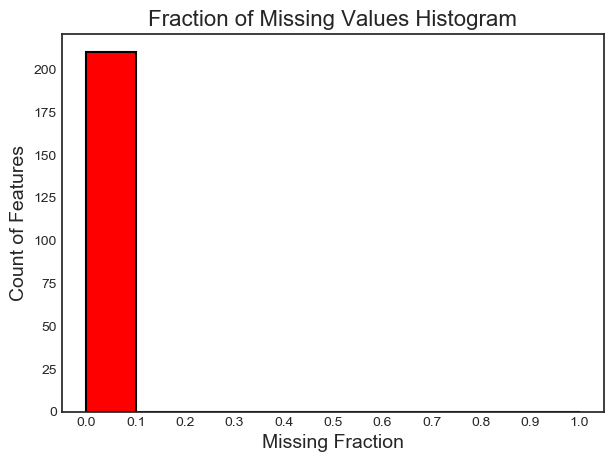

In [23]:
fs.plot_missing()

#### Check Collinearity

In [24]:
fs.identify_collinear(correlation_threshold=0.95)

100 features with a correlation magnitude greater than 0.95.



In [25]:
collinear_features = fs.ops['collinear']
fs.record_collinear.head(20)

,drop_feature,corr_feature,corr_value
0,FTR Truck Loadings Index (2000=100)_freight_m_...,"FTR Truck Loadings (000s, SA)_freight_m_trucking",1.000000
1,"Dry Van Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.960822
2,"Dry Van Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.960822
3,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.994974
4,"Flatbed Trailer Loadings (000s, SA)_freight_m_...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.994974
5,"Flatbed Trailer Loadings (000s, SA)_freight_m_...","Dry Van Trailer Loadings (000s, SA)_freight_m_...",0.957094
6,"Bulk Trailer/Straight Truck Loadings (000s, SA...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.992075
7,"Bulk Trailer/Straight Truck Loadings (000s, SA...",FTR Truck Loadings Index (2000=100)_freight_m_...,0.992075
8,"Bulk Trailer/Straight Truck Loadings (000s, SA...","Flatbed Trailer Loadings (000s, SA)_freight_m_...",0.988296
9,"Stone, Clay, Glass & Concrete (000s, SA)_freig...","FTR Truck Loadings (000s, SA)_freight_m_trucking",0.971318


#### Check zero importance features

In [26]:
fs.identify_zero_importance(task='regression', eval_metric='mse', early_stopping=False)

Training Gradient Boosting Model


24 features with zero importance after one-hot encoding.



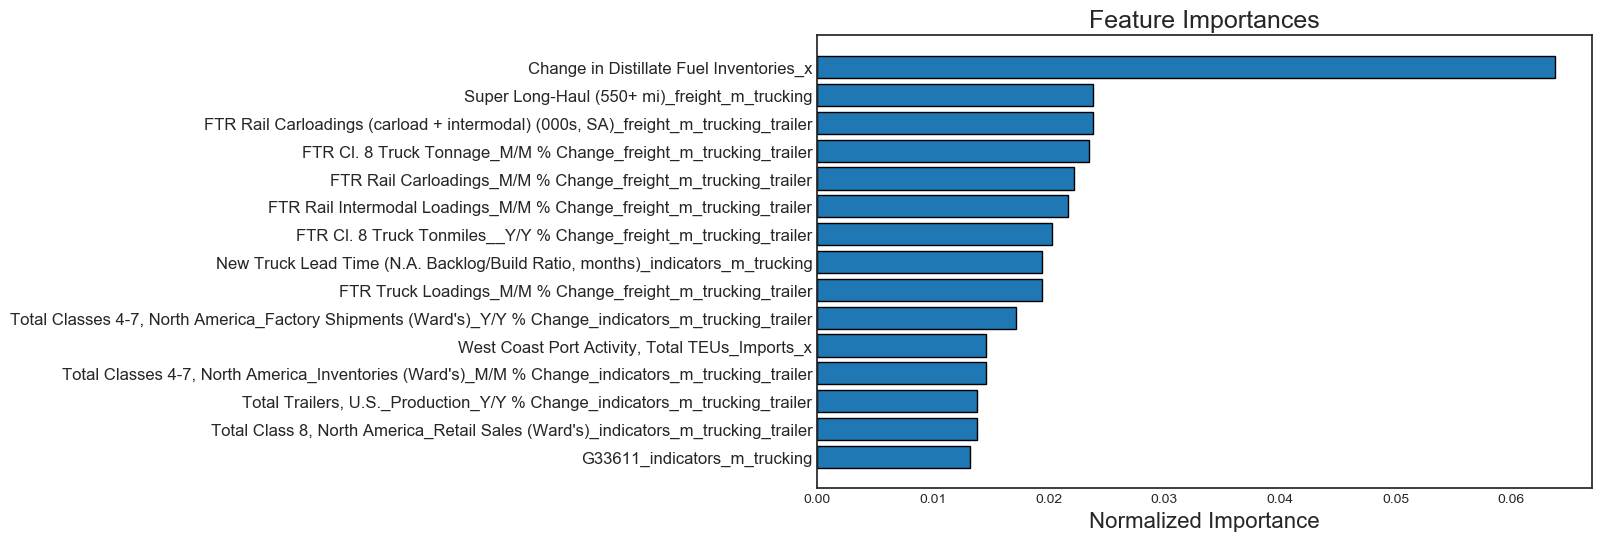

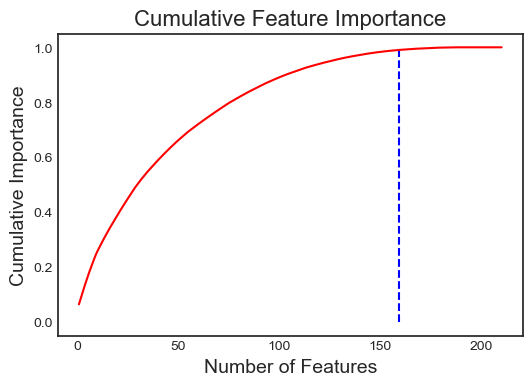

159 features required for 0.99 of cumulative importance


In [27]:
fs.plot_feature_importances(threshold=0.99)

#### Check Low Importance Features

In [28]:
fs.identify_low_importance(cumulative_importance=0.99)
fs.feature_importances.head(20)

158 features required for cumulative importance of 0.99 after one hot encoding.
52 features do not contribute to cumulative importance of 0.99.



,feature,importance,normalized_importance,cumulative_importance
0,Change in Distillate Fuel Inventories_x,342.0,0.063818,0.063818
1,Super Long-Haul (550+ mi)_freight_m_trucking,128.0,0.023885,0.087703
2,FTR Rail Carloadings (carload + intermodal) (0...,128.0,0.023885,0.111588
3,FTR Cl. 8 Truck Tonnage_M/M % Change_freight_m...,126.0,0.023512,0.135100
4,FTR Rail Carloadings_M/M % Change_freight_m_tr...,119.0,0.022206,0.157305
5,FTR Rail Intermodal Loadings_M/M % Change_frei...,116.0,0.021646,0.178951
6,FTR Cl. 8 Truck Tonmiles__Y/Y % Change_freight...,109.0,0.020340,0.199291
7,"New Truck Lead Time (N.A. Backlog/Build Ratio,...",104.0,0.019407,0.218698
8,FTR Truck Loadings_M/M % Change_freight_m_truc...,104.0,0.019407,0.238104
9,"Total Classes 4-7, North America_Factory Shipm...",92.0,0.017167,0.255272


#### Remove features

In [29]:
feature_selected = fs.remove(methods=['missing','collinear','zero_importance','low_importance'])
features = np.append(list(['Sum of Sales']),list(feature_selected.columns))
df = df[features]
df

Removed 110 features.


,Sum of Sales,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,...,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_SA Imports_x"
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01,381696.51,88.294650,6915.782704,7126.929795,10308.534148,3013.868684,6351.102588,1170.414269,96.932289,108.993355,...,46969.0,1.488579e+06,1.035742e+06,428531.270000,8.168066e+05,446657.730000,90322.590000,97597.00000,70230.000000,92712.867945
2008-02,430305.85,87.998407,6836.939472,7090.093356,10204.426697,2975.285847,6306.556660,1208.727901,99.719858,111.740791,...,44924.0,1.497040e+06,1.138045e+06,478707.330000,9.662124e+05,472359.530000,100410.660000,105664.00000,86567.000000,123918.281279
2008-03,451627.81,87.790155,6758.129439,7130.846968,9905.221411,2941.079313,6261.756219,1153.773630,103.347853,115.049162,...,46727.0,1.403435e+06,1.167742e+06,500866.450000,8.138837e+05,493039.820000,93384.280000,89275.00000,80451.000000,102763.241378
2008-04,467417.48,89.639867,6858.428982,7139.440571,9962.735227,2906.591249,6271.352278,1167.916023,111.718085,122.429912,...,53497.0,1.534105e+06,1.156788e+06,486063.840000,8.183477e+05,484342.050000,101642.940000,107793.00000,84739.000000,108298.068115
2008-05,462676.37,89.134818,6804.610846,7179.943436,9664.030444,2872.185063,6275.163788,1165.739510,117.525703,128.075063,...,53653.0,1.565027e+06,1.185090e+06,490618.980000,8.016842e+05,499498.010000,105424.640000,102278.00000,89548.000000,100455.980122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07,456579.51,89.962431,6571.127779,9375.896057,9314.211052,2639.040651,6240.013431,1276.017801,115.128696,128.251725,...,57503.0,2.258645e+06,1.095134e+06,393775.832112,9.768974e+05,472910.156297,125276.157772,225515.00000,103172.000000,203343.596376
2020-08,318564.72,90.641835,6601.260917,9520.297567,9264.702227,2676.666422,6312.982923,1289.291135,129.107598,142.915080,...,56478.0,2.478926e+06,1.108304e+06,389408.103791,9.985477e+05,499597.784894,125319.157772,235159.00000,93979.000000,212554.287841
2020-09,980476.36,90.587889,6556.745680,9472.590699,9501.262401,2600.808117,6258.050709,1303.140621,136.100117,150.314527,...,59269.0,2.403570e+06,1.099329e+06,386298.700253,9.583687e+05,492325.048120,117576.128306,216790.00000,103129.000000,200875.373073


In [137]:
#df.to_csv('Pack_ext_fs.csv')

In [30]:
%matplotlib inline
import pandas as pd # for using pandas daraframe
import numpy as np # for som math operations
from sklearn.preprocessing import StandardScaler # for standardizing the Data
from sklearn.decomposition import PCA # for PCA calculation
import matplotlib.pyplot as plt # for plotting

In [31]:
features = df.loc[:, df.columns != 'Sum of Sales']
features

,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,...,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_SA Imports_x"
Year_Month,,,,,,,,,,,,,,,,,,,,,
2008-01,88.294650,6915.782704,7126.929795,10308.534148,3013.868684,6351.102588,1170.414269,96.932289,108.993355,112.305447,...,46969.0,1.488579e+06,1.035742e+06,428531.270000,8.168066e+05,446657.730000,90322.590000,97597.00000,70230.000000,92712.867945
2008-02,87.998407,6836.939472,7090.093356,10204.426697,2975.285847,6306.556660,1208.727901,99.719858,111.740791,112.181182,...,44924.0,1.497040e+06,1.138045e+06,478707.330000,9.662124e+05,472359.530000,100410.660000,105664.00000,86567.000000,123918.281279
2008-03,87.790155,6758.129439,7130.846968,9905.221411,2941.079313,6261.756219,1153.773630,103.347853,115.049162,111.302493,...,46727.0,1.403435e+06,1.167742e+06,500866.450000,8.138837e+05,493039.820000,93384.280000,89275.00000,80451.000000,102763.241378
2008-04,89.639867,6858.428982,7139.440571,9962.735227,2906.591249,6271.352278,1167.916023,111.718085,122.429912,110.502609,...,53497.0,1.534105e+06,1.156788e+06,486063.840000,8.183477e+05,484342.050000,101642.940000,107793.00000,84739.000000,108298.068115
2008-05,89.134818,6804.610846,7179.943436,9664.030444,2872.185063,6275.163788,1165.739510,117.525703,128.075063,110.767343,...,53653.0,1.565027e+06,1.185090e+06,490618.980000,8.016842e+05,499498.010000,105424.640000,102278.00000,89548.000000,100455.980122
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07,89.962431,6571.127779,9375.896057,9314.211052,2639.040651,6240.013431,1276.017801,115.128696,128.251725,137.122933,...,57503.0,2.258645e+06,1.095134e+06,393775.832112,9.768974e+05,472910.156297,125276.157772,225515.00000,103172.000000,203343.596376
2020-08,90.641835,6601.260917,9520.297567,9264.702227,2676.666422,6312.982923,1289.291135,129.107598,142.915080,139.852134,...,56478.0,2.478926e+06,1.108304e+06,389408.103791,9.985477e+05,499597.784894,125319.157772,235159.00000,93979.000000,212554.287841
2020-09,90.587889,6556.745680,9472.590699,9501.262401,2600.808117,6258.050709,1303.140621,136.100117,150.314527,141.491235,...,59269.0,2.403570e+06,1.099329e+06,386298.700253,9.583687e+05,492325.048120,117576.128306,216790.00000,103129.000000,200875.373073


In [32]:
df.dropna(axis = 1, inplace = True)
X = features.values # getting all values as a matrix of dataframe 
sc = StandardScaler() # creating a StandardScaler object
X_std = sc.fit_transform(X) # standardizing the data

0

In [33]:
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. In this case it is 4 same as above we saw in step 5

47


In [34]:
pd.DataFrame(pca.components_, columns = features.columns)

,"FTR Active Truck Utilization (%, SA)_freight_m_trucking","Tank Trailer Loadings (000s, SA)_freight_m_trucking","Food & Kindred Products (000s, SA)_freight_m_trucking","Nonmetallic Minerals, Except Fuels (000s, SA)_freight_m_trucking","Chemicals & Allied Products (000s, SA)_freight_m_trucking",Super Long-Haul (550+ mi)_freight_m_trucking,"FTR Rail Intermodal Loadings (000, SA)_freight_m_trucking",Spot TL Rates (w/o FSC)_rates_m_trucking,Spot TL Rates w/Fuel_rates_m_trucking,Contract TL Rates w/Fuel_rates_m_trucking,...,Canada Origin Intermodal Volumes_Domestic_x,"N.A. Port Activity, Total TEUs_Imports_x","N.A. Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_Exports_x","West Coast Port Activity, Total TEUs_SA Imports_x","East Coast Port Activity, Total TEUs_Exports_x","Gulf Coast Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_Imports_x","Western Canadian Port Activity, Total TEUs_Exports_x","Western Canadian Port Activity, Total TEUs_SA Imports_x"
0,-0.059393,-0.039782,-0.129483,-0.111013,-0.013844,-0.116244,-0.158509,-0.125608,-0.115050,-0.143009,...,-0.139127,-0.144442,-0.110122,0.004746,-0.125363,-0.131412,-0.125075,-0.142754,-0.123292,-0.147125
1,-0.012007,0.177077,0.129772,0.184816,0.104397,0.155391,-0.032296,-0.008641,-0.088224,-0.019779,...,-0.029733,0.063944,-0.096974,-0.117182,0.048872,-0.093343,0.067620,0.049857,-0.034560,0.047754
2,0.100889,0.126926,-0.083213,0.066786,0.203159,0.081991,0.019218,0.123866,0.124074,-0.073066,...,0.048236,-0.055407,0.053647,0.163145,0.011325,0.013257,-0.067892,-0.103899,-0.097798,-0.101268
3,-0.229570,-0.041659,-0.106388,0.003304,-0.095102,-0.080934,-0.025323,-0.055218,-0.043072,-0.011610,...,-0.015575,-0.104398,-0.040675,-0.044103,-0.101158,-0.019754,-0.041497,-0.084412,-0.018649,-0.074498
4,0.163702,0.110125,0.067637,0.014055,0.162705,0.065998,-0.048837,0.018506,0.031786,0.032602,...,-0.029583,0.041997,0.012924,0.025471,0.026243,-0.001838,-0.003161,0.037672,0.019629,0.033114
5,0.099621,0.133747,0.091134,-0.009353,0.194517,0.071893,-0.034210,0.024050,0.076178,0.138866,...,-0.043047,0.034892,0.047346,0.039743,0.040343,0.015553,0.080280,0.059304,0.045620,0.060136
6,0.006495,-0.121223,-0.016895,0.002173,-0.071559,-0.040066,0.049095,0.072305,0.108809,0.053781,...,0.086585,-0.010536,0.230407,0.243033,0.044645,0.150823,0.091754,0.004958,0.150219,0.059808
7,-0.197602,-0.060059,-0.034439,-0.033199,-0.022539,-0.089271,-0.038197,0.098366,0.155159,0.136462,...,0.001899,0.072094,0.026945,0.031938,-0.027043,0.005497,0.041000,0.079622,0.015907,0.038398
8,0.139410,-0.063260,-0.020735,0.020141,-0.105476,-0.016349,0.102113,0.094444,0.024507,-0.131007,...,0.142528,0.032658,-0.019650,-0.027516,0.083218,0.021825,-0.094235,0.006036,-0.017665,0.005661
9,-0.040487,0.067488,0.042926,0.006232,0.085377,0.034710,-0.064386,-0.140877,-0.123988,0.025168,...,-0.056398,-0.100405,0.137418,0.114009,-0.064552,0.103136,0.169063,-0.089790,0.003987,0.002975


In [35]:
n_pcs= pca.n_components_ # get number of component
n_pcs

47

In [36]:
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

In [37]:
initial_feature_names = features.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

In [38]:
most_important_names

['B50001_indicators_m_trucking',
 "Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",
 'G325_indicators_m_trucking',
 "Change in Total Transp. Emp. (000's)_driver_indicators_m_trucking",
 'FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer',
 'FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer',
 "Total Class 8, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer",
 "Total Class 8, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'FTR MD Truck Tonmiles_M/M % Change_freight_m_trucking_trailer',
 "Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'West Coast Port Activity, Total TEUs_Exports_x',
 'Change in Distillate Fuel Inventories_x',
 'Change in Distillate Fuel Inventories_x',
 "Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",
 'Change in Distillate Fuel Inventories_x',
 'FTR Rai

In [71]:
finalDF = df[['Sum of Sales',
    'BUILD FOR_Total_Trailer',
 "Class 4, North America_Inventories (Ward's)_indicators_m_trucking_trailer",
 'G325_indicators_m_trucking',
 'FTR Active Truck Utilization (%, SA)_freight_m_trucking',
 "Change in Payroll Employment (000's)_driver_indicators_m_trucking",
 "Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 "Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'FTR Truck Loadings_Y/Y % Change_freight_m_trucking_trailer',
 "Total Class 8, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'Change in Distillate Fuel Inventories_x',
 'OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking',
 'FTR Rail Intermodal Loadings_Y/Y % Change_freight_m_trucking_trailer',
 "Class 6-7 Bus, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",
 'Change in Distillate Fuel Inventories_x',
 'FTR Truck Loadings_M/M % Change_freight_m_trucking_trailer',
 "Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer',
 'FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer',
 "Total Class 8, North America_Factory Shipments (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer',
 "Total Classes 4-7, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'FTR Rail Carloadings_M/M % Change_freight_m_trucking_trailer',
 'FTR Intermodal Competitive Index_Intermodal Competitive Index (0=Neutral)_x',
 'Total Trailers, U.S._Production_M/M % Change_indicators_m_trucking_trailer',
 "Total Class 8, North America_Inventories (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer',
 'LEI_indicators_m_trucking',
 'Western Canadian Port Activity, Total TEUs_Exports_x',
 'FTR Rail Intermodal Loadings_M/M % Change_freight_m_trucking_trailer',
 'OEM Net Orders (U.S. / CAN, units)_indicators_m_trucking',
 "Total Classes 4-7, North America_Retail Sales (Ward's)_M/M % Change_indicators_m_trucking_trailer",
 'FTR Rail Carloadings (carload + intermodal) (000s, SA)_freight_m_trucking_trailer',
 "Change in Truck Emp. (000's)_driver_indicators_m_trucking",
 'BUILD FOR_All_Other',
 'PORTEU_indicators_m_trucking',
 'BUILD FOR_All_Other',
 "Change in Truck Emp. (000's)_driver_indicators_m_trucking",
 "Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer",
 'Total Trailers, U.S._Production_Y/Y % Change_indicators_m_trucking_trailer',
 "Class 4, North America_Factory Shipments (Ward's)_indicators_m_trucking_trailer",
 "Total Classes 4-7, North America_Factory Shipments (Ward's)_Y/Y % Change_indicators_m_trucking_trailer",
 'Canada Origin Intermodal Volumes_Domestic_x']]

In [72]:
finalDF.to_csv('pack_ext_fs.csv')